In [ ]:
#importando drive com imagens
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pathlib


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # Updated import statements
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from keras import metrics

In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/TCC_DOCS/images")
print(data_dir)

/content/drive/MyDrive/TCC_DOCS/images


In [ ]:
#tamanho de imagem
vgg16_img_size = 100
#número de exemplos que serão processados juntos em uma única iteração do modelo durante o treinamento
vgg16_batch_size = 150

vgg16_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(vgg16_img_size, vgg16_img_size),
    batch_size=vgg16_batch_size)

vgg16_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(vgg16_img_size,vgg16_img_size),
    batch_size=vgg16_batch_size)

vgg16_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(vgg16_img_size,vgg16_img_size),
    batch_size=vgg16_batch_size)

class_names = vgg16_test_ds.class_names

Found 47813 files belonging to 5 classes.
Found 47813 files belonging to 5 classes.
Using 9562 files for validation.
Found 47813 files belonging to 5 classes.


In [ ]:
for image_batch, labels_batch in vgg16_train_ds:
  vgg16_train_img = image_batch
  vgg16_train_labels = labels_batch
  break
for image_batch, labels_batch in vgg16_val_ds:
  vgg16_val_img = image_batch
  vgg16_val_labels = labels_batch
  break
for image_batch, labels_batch in vgg16_test_ds:
  vgg16_test_img = image_batch
  vgg16_test_labels = labels_batch
  break

In [ ]:
# ajusta automaticamente o número de threads para o pré-processamento dos dados. melhorar a performance e a eficiência do pipeline de dados.
AUTOTUNE = tf.data.experimental.AUTOTUNE

vgg16_train_ds = vgg16_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
vgg16_val_ds = vgg16_val_ds.cache().prefetch(buffer_size=AUTOTUNE)
vgg16_test_ds = vgg16_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# VGG16
img_shape = (vgg16_img_size,vgg16_img_size,3)
VGG16_model = tf.keras.applications.VGG16(input_shape=img_shape,include_top=False,weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
VGG16_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(5,activation='relu',bias_regularizer=regularizers.l2(1e-4))

In [ ]:
num_classes = 5
vgg16_model = Sequential([
    VGG16_model,
    prediction_layer,
    global_average_layer,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Activation('softmax'),
])

ValueError: Undefined shapes are not supported.

In [ ]:
vgg16_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs = 50
history = vgg16_model.fit(
  vgg16_train_ds,
  validation_data=vgg16_val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


319/319 ━━━━━━━━━━━━━━━━━━━━ 1734s 196ms/step - accuracy: 0.4504 - loss: 1.4837 - val_accuracy: 0.7273 - val_loss: 0.9615
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7100 - loss: 0.9905 - val_accuracy: 0.7469 - val_loss: 0.8469
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.7486 - loss: 0.8417 - val_accuracy: 0.7556 - val_loss: 0.7930
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7625 - loss: 0.7579 - val_accuracy: 0.7732 - val_loss: 0.7121
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7687 - loss: 0.7053 - val_accuracy: 0.7772 - val_loss: 0.6707
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7693 - loss: 0.6750 - val_accuracy: 0.7821 - val_loss: 0.6446
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7780 - loss: 0.6434 - val_accuracy: 0.7773 - val_loss: 0.6450
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7751 - loss: 0.6326 - val_accu

In [ ]:
vgg16_loss, vgg16_acc = vgg16_model.evaluate(vgg16_test_ds)

319/319 ━━━━━━━━━━━━━━━━━━━━ 127s 397ms/step - accuracy: 0.7911 - loss: 0.5612


In [ ]:
vgg16_y_pred=np.argmax(vgg16_model.predict(vgg16_test_img), axis=-1)
vgg16_con_mat = tf.math.confusion_matrix(labels=vgg16_test_labels, predictions=vgg16_y_pred).numpy()

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 829ms/step


In [ ]:
vgg16_con_mat_norm = np.around(vgg16_con_mat.astype('float') / vgg16_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

vgg16_con_mat_df = pd.DataFrame(vgg16_con_mat_norm,
                     index = class_names,
                     columns = class_names)

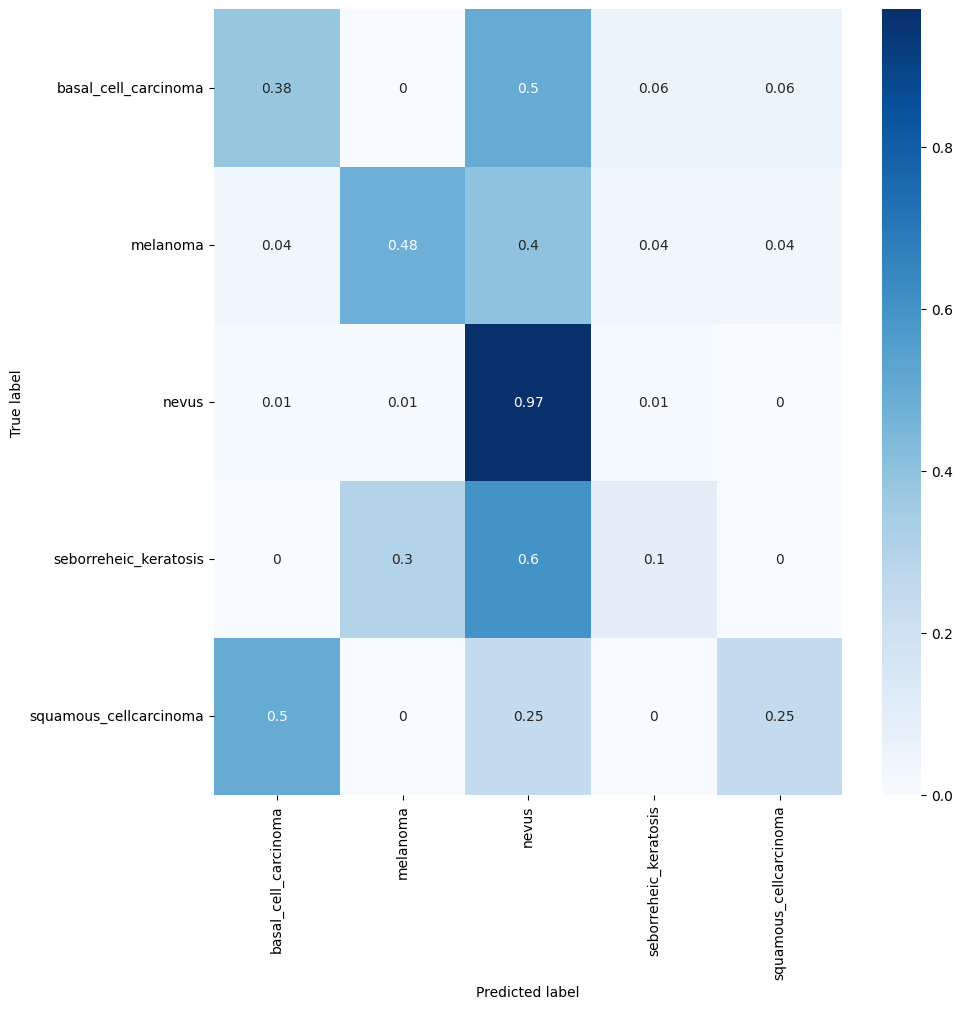

In [ ]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(vgg16_con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
vgg16_y_pred = vgg16_model.predict(vgg16_test_ds)
vgg16_predicted_categories = np.argmax(vgg16_y_pred, axis = 1)

319/319 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step


In [ ]:
vgg16_true_categories = tf.concat([y for x, y in vgg16_test_ds], axis = 0).numpy() # convert to np array

In [ ]:
print(classification_report(vgg16_true_categories, vgg16_predicted_categories))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60      4767
           1       0.64      0.45      0.53      7226
           2       0.85      0.94      0.89     32614
           3       0.53      0.18      0.27      1905
           4       0.43      0.29      0.35      1301

    accuracy                           0.79     47813
   macro avg       0.60      0.50      0.53     47813
weighted avg       0.77      0.79      0.77     47813

